## Keras NN - Chronic KIdney Disease dataset

In [ ]:
#imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.cross_validation import  train_test_split
from matplotlib import pyplot
from sklearn import metrics
from sklearn.cross_validation import KFold, cross_val_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_tree
from time import time
from sklearn.preprocessing import StandardScaler

from keras.layers import Dropout


In [2]:
df= pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
print(df.loc[df['classification'] == 'ckd\t'])

      id   age    bp    sg   al   su     rbc        pc         pcc  \
37    37  72.0  80.0   NaN  NaN  NaN     NaN       NaN  notpresent   
230  230  65.0  60.0  1.01  2.0  0.0  normal  abnormal     present   

             ba      ...        pcv    wc   rc  htn   dm  cad appet  pe  ane  \
37   notpresent      ...         28  6900  2.5  yes  yes   no  poor  no  yes   
230  notpresent      ...        NaN  9500  NaN  yes  yes   no  poor  no   no   

    classification  
37           ckd\t  
230          ckd\t  

[2 rows x 26 columns]


In [5]:
df.shape

(400, 26)

In [6]:
df.drop(['id'], axis=1, inplace= True)

In [7]:
df.shape

(400, 25)

In [8]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [9]:
def categorical_to_numeric_diagnosis(x):
    if x=='ckd':
        return 1
    if x=='ckd\t':
        return 0
    if x=='notckd':
        return 0

In [10]:
df['classification']= df['classification'].apply(categorical_to_numeric_diagnosis)

In [11]:
df['classification'].unique()

array([1, 0])

In [12]:
df['ane'].unique()

array(['no', 'yes', nan], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe                399 non-null object
ane       

In [14]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [15]:
df.drop(['pc', 'bgr','wc', 'rc', 'pcv', 'hemo', 'sod', 'pot', 'rbc', 'su', 'al', 'sg'], axis=1, inplace= True)

In [16]:
df.shape

(400, 13)

In [17]:
df.isnull().sum()

age                9
bp                12
pcc                4
ba                 4
bu                19
sc                17
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

In [18]:
df['age'].fillna((df['age'].mean()), inplace=True)

In [19]:
df['bp'].fillna((df['bp'].mode()), inplace=True)

In [20]:
df['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [21]:
df.fillna(df['pcc'].value_counts().index[0], inplace=True)

In [22]:
df['pcc'].value_counts()

notpresent    358
present        42
Name: pcc, dtype: int64

In [23]:
df['ba'].value_counts()

notpresent    378
present        22
Name: ba, dtype: int64

In [28]:
df = df.fillna(df['ba'].value_counts().index[0])

In [29]:
df['bu'].fillna((df['bu'].mode()), inplace=True)

In [30]:
df['sc'].fillna((df['sc'].mode()), inplace=True)

In [31]:
df['htn'].value_counts()

no            251
yes           147
notpresent      2
Name: htn, dtype: int64

In [32]:
df['dm'].value_counts()

no            258
yes           134
\tno            3
\tyes           2
notpresent      2
 yes            1
Name: dm, dtype: int64

In [35]:
df['cad'].value_counts()

no            362
yes            34
\tno            2
notpresent      2
Name: cad, dtype: int64

In [37]:
df['pe'].value_counts()

no            323
yes            76
notpresent      1
Name: pe, dtype: int64

In [38]:
df['ane'].value_counts()

no            339
yes            60
notpresent      1
Name: ane, dtype: int64

In [43]:
df.ane.replace(['no','yes','notpresent'], [0,1,0], inplace=True)

In [44]:
df['ane'].value_counts()

0    340
1     60
Name: ane, dtype: int64

In [45]:
df.pe.replace(['no','yes','notpresent'], [0,1,0], inplace=True)

In [46]:
df['pe'].value_counts()

0    324
1     76
Name: pe, dtype: int64

In [48]:
df.cad.replace(['no','yes','\tno','notpresent'], [0,1,0,0], inplace=True)

In [49]:
df['cad'].value_counts()

0    366
1     34
Name: cad, dtype: int64

In [50]:
df.dm.replace(['no','yes','\tno','\tyes','notpresent',' yes'], [0,1,0,1,0,1], inplace=True)  

In [51]:
df['dm'].value_counts()

0    263
1    137
Name: dm, dtype: int64

In [53]:
df.htn.replace(['no','yes','notpresent'], [0,1,0], inplace=True)

In [54]:
df['htn'].value_counts()

0    253
1    147
Name: htn, dtype: int64

In [57]:
df.bp.replace(['notpresent'], [80.0], inplace=True)

In [58]:
df['bp'].value_counts()

80.0     128
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
120.0      1
180.0      1
140.0      1
Name: bp, dtype: int64

In [59]:
df['pcc'].value_counts()

notpresent    358
present        42
Name: pcc, dtype: int64

In [61]:
df.pcc.replace(['notpresent','present'], [0,1], inplace=True)

In [62]:
df['pcc'].value_counts()

0    358
1     42
Name: pcc, dtype: int64

In [63]:
df['ba'].value_counts()

notpresent    378
present        22
Name: ba, dtype: int64

In [64]:
df.ba.replace(['notpresent','present'], [0,1], inplace=True)

In [68]:
df.sc.replace(['notpresent'], [0.9], inplace=True)

In [71]:
df['appet'].value_counts()

good          317
poor           82
notpresent      1
Name: appet, dtype: int64

In [73]:
df.appet.replace(['good','poor','notpresent'], [1,0,0], inplace=True)

In [88]:
df.bu.replace(['notpresent'], [50.0], inplace=True)

In [74]:
df.head()

,age,bp,pcc,ba,bu,sc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,0,0,36,1.2,1,1,0,1,0,0,1
1,7.0,50.0,0,0,18,0.8,0,0,0,1,0,0,1
2,62.0,80.0,0,0,53,1.8,0,1,0,0,0,1,1
3,48.0,70.0,1,0,56,3.8,1,0,0,0,1,1,1
4,51.0,80.0,0,0,26,1.4,0,0,0,1,0,0,1


In [96]:
features = list(df.columns[0:12])

In [97]:
features

['age',
 'bp',
 'pcc',
 'ba',
 'bu',
 'sc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [98]:
df['ane'].value_counts()

0    340
1     60
Name: ane, dtype: int64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['classification'].values, test_size=0.30, random_state=42)

In [100]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

# Adding the third hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                416       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total para

In [101]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [102]:
scaler = StandardScaler()

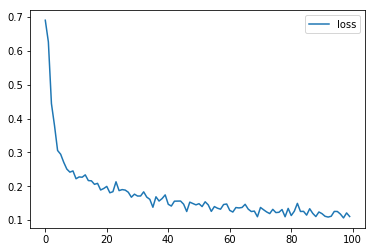

280/280 [==============================] - 1s 3ms/step - loss: 0.1106 - acc: 0.9679


In [103]:
classifier.fit(scaler.fit_transform(X_train.values), np.array(y_train),batch_size = 5,epochs=100,callbacks=[plot_losses])

In [104]:
from keras.models import load_model

classifier.save('chronic_kidney.h5') #Save trained ANN

In [105]:
y_prediction = classifier.predict_classes(scaler.transform(X_test.values))

120/120 [==============================] - 0s 1ms/step


In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)
tn, fn, fp, tp=confusion_matrix(y_prediction,y_test).ravel()

print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[43  1]
 [ 5 71]]
Accuracy: 95.0%


In [107]:
sens=tp/(tp+fn)
spec=tn/(tn+fp)
print("Senstivity:",sens)
print("Specificity:",spec)

Senstivity: 0.9342105263157895
Specificity: 0.9772727272727273
